In [1]:
import ms_analysis as msa

In [2]:
mc = msa.MSout("ms_out/pH7eH0ms.txt")

In [3]:
#Write out the microstate  file ordering based on lowest energy in pickle format
ms_orig_lst = [[ms.E, ms.count, ms.state] for  ms in list((mc.microstates.values()))]
ms_orig_lst = sorted(ms_orig_lst, key = lambda x:x[0])


In [4]:
# This will convert the charge microstate id to charge id.
id_vs_charge = {}
for conf in msa.conformers:
    id_vs_charge[conf.iconf] = conf.crg

def convert_ms_crg(l, d):
    crg_lst =[[y[0], y[1], [convert_ms_crg(x, d) if isinstance(x, list) else d.get(x, x) for x in y[2]]] for y in l]
    return crg_lst

crg_orig_lst = convert_ms_crg(ms_orig_lst, id_vs_charge )


In [ ]:
#  plot the enthalpy distribution and energy count distribution
# lets flatten the list
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
energy_lst_count =np.asarray([a for a,f in zip([x[0] for x in crg_orig_lst], [x[1] for x in crg_orig_lst]) for _ in range(f)])
energy_lst = np.asarray([x[0] for  x in crg_orig_lst])

fig = plt.figure(figsize = (12,6))
fig.suptitle("MQ Antiporter fr_50")

plt.subplot(121)
plt.title(' Total Count (MC)')
sns.histplot(energy_lst_count,binwidth=2, kde = True)
plt.xlabel(" Enthalpy (Kcal/Mol)")


plt.subplot(122)
sns.histplot(energy_lst, binwidth=2)
plt.title('No Count from MC')
plt.xlabel(" Enthalpy (Kcal/Mol)")
fig.savefig("enthalpy_dis.pdf", dpi = 600, bbox_inches = "tight")

In [5]:
# This will make a free residues list.
import pandas as pd
free_residues = []
for res in mc.free_residues:
    free_residues.append(msa.conformers[res[0]].resid)
ms_free_residues = pd.DataFrame(free_residues,columns = ["Residue"])
ms_free_residues

,Residue
0,THRT0006_
1,LYST0022_
2,GLUT0026_
3,SERT0034_
4,ARGT0054_
...,...
198,SERU0436_
199,TYRU0449_
200,HISU0455_
201,GLUU0459_


In [6]:
# This will make the fixed ionizable residues list.
fixed_resid = []
for conf in msa.conformers:
    if conf.resid not in free_residues:
        if conf.resid[:3] == "NTR" or conf.resid[:3] == "CTR" or conf.resid[:3] == "HIS" or conf.resid[:3] == "LYS" or conf.resid[:3] == "ARG" or conf.resid[:3] == "CYS" or conf.resid[:3] == "ASP" or conf.resid[:3] == "GLU" or conf.resid[:3] == "TYR":
            if conf.resid not in fixed_resid:
                fixed_resid.append(conf.resid)
    
print(fixed_resid[:3])

['NTRT0001_', 'ARGT0023_', 'ARGT0025_']


In [7]:
# This will read the back ground charge i.e. not appearing in microstate file.
def read_backcrg(fname, ph):
    fixed_resid_vs_crg = {} 
    lines = open(fname).readlines()[:-4]
    headline = lines.pop(0)
    fields = headline.split()
    t_type = fields[0].strip()
    t_points = [float(x) for x in fields[1:]]
    index_ph = t_points.index(float(ph)) + 1
    for line in lines:
        fields = line.split()
        if (fields[0][:3] + fields[0][4:]) in fixed_resid:
            fixed_resid_vs_crg[(fields[0][:3] + fields[0][4:])] = round(float(fields[index_ph]), 0)
    back_crg= round(sum(list(fixed_resid_vs_crg.values())),0)

    return back_crg, fixed_resid_vs_crg

In [8]:
# make sure give the same ph value you used to read the ms file
fixed_sum_crg = read_backcrg("sum_crg.out", 7)
print(fixed_sum_crg[1])
print(fixed_sum_crg[0])
# THis will make the charge information of fixed residues for MD simulation.
fixed_residues_crg = pd.DataFrame(fixed_sum_crg[1].items(), columns=['Residue', 'crg'])
fixed_residues_crg

{'NTRT0001_': 0.0, 'ARGT0023_': 1.0, 'ARGT0025_': 1.0, 'ASPT0070_': -1.0, 'HIST0088_': 0.0, 'TYRT0090_': -0.0, 'TYRT0094_': -0.0, 'ASPT0098_': -1.0, 'TYRT0107_': -0.0, 'TYRT0124_': -0.0, 'TYRT0146_': -0.0, 'LYST0147_': 1.0, 'TYRT0151_': -0.0, 'LYST0157_': 1.0, 'ASPT0166_': -1.0, 'LYST0189_': 1.0, 'LYST0197_': 1.0, 'ASPT0200_': -1.0, 'ASPT0228_': -1.0, 'TYRT0251_': -0.0, 'TYRT0260_': -0.0, 'TYRT0268_': -0.0, 'TYRT0305_': -0.0, 'TYRT0315_': -0.0, 'ASPT0348_': -1.0, 'LYST0351_': 1.0, 'LYST0357_': 1.0, 'ARGT0363_': 1.0, 'LYST0385_': 1.0, 'TYRT0395_': -0.0, 'TYRT0403_': -0.0, 'TYRT0416_': -0.0, 'GLUT0490_': -1.0, 'ARGT0514_': 1.0, 'LYST0515_': 1.0, 'GLUT0530_': -1.0, 'TYRT0555_': -0.0, 'ARGT0558_': 1.0, 'TYRT0564_': -0.0, 'ARGT0572_': 1.0, 'ARGT0580_': 1.0, 'ARGT0605_': 1.0, 'ARGU0022_': 1.0, 'TYRU0038_': -0.0, 'ARGU0090_': 1.0, 'GLUU0092_': -1.0, 'ARGU0094_': 1.0, 'ASPU0114_': -1.0, 'TYRU0136_': -0.0, 'ARGU0141_': 1.0, 'ARGU0143_': 1.0, 'TYRU0146_': -0.0, 'ARGU0167_': 1.0, 'GLUU0178_': -1.

,Residue,crg
0,NTRT0001_,0.0
1,ARGT0023_,1.0
2,ARGT0025_,1.0
3,ASPT0070_,-1.0
4,HIST0088_,0.0
...,...,...
65,TYRU0405_,-0.0
66,ASPU0424_,-1.0
67,GLUU0429_,-1.0
68,ARGU0452_,1.0


In [ ]:
# This will find the unique charge of all charge microstate. Three unique charge state with highest count will select for MD.
crg_all_count = {}
for array in crg_orig_lst:
    if tuple(array[2]) not in crg_all_count.keys():
        crg_all_count[(tuple(array[2]))] = array[1]
    else:
        crg_all_count[(tuple(array[2]))] += array[1]

# make a list of count and charge microstate
all_crg_ms_unique  = []
all_count = []
for u,v in crg_all_count.items():
    all_crg_ms_unique.append(list(u))
    all_count.append(v)
print(f" Total charge ms : {len(crg_orig_lst )}, Total Unique charge ms  {len(all_crg_ms_unique)}")

# make the panda data frame and concatinate
# make panda series and save
import pandas as pd
all_crg_ms_lst = pd.DataFrame(all_crg_ms_unique).T
all_ms_count = pd.DataFrame(all_count,columns = ["Count"]).T
all_crg_ms_count_pd = pd.concat([all_crg_ms_lst.reindex(all_crg_ms_lst.index), all_ms_count])
all_crg_count_res_1 = pd.concat([ms_free_residues, all_crg_ms_count_pd.reindex(all_crg_ms_count_pd.index)], axis=1)
from numpy import inf
all_crg_count_res_1 = all_crg_count_res_1.fillna('Count')
# remove the non titrable residues
all_crg_count_res = all_crg_count_res_1.copy()
for x,y in all_crg_count_res.iterrows():
    if y['Residue'][:3] != "NTR" and y['Residue'][:3] != "CTR" and y['Residue'][:5] != "Count" and y['Residue'][:3] != "ASP" and y['Residue'][:3] != "GLU"\
       and y['Residue'][:3] != "LYS" and y['Residue'][:3] != "TYR" and  y['Residue'][:3] != "ARG" and y['Residue'][:3] != "CYS"and y['Residue'][:3] != "HIS":
        
        all_crg_count_res.drop([x], inplace = True)

all_crg_count_res = all_crg_count_res.set_index("Residue")
# sort based on the count
all_crg_count_res = all_crg_count_res.sort_values(by = "Count", axis = 1, ascending = False)


# take highest three count for MD
all_crg_count_res_md = all_crg_count_res.iloc[:, :3]
all_crg_count_res_md



In [ ]:
# which tautomer charge state is most populated. This includes the background charge also.
import matplotlib.pyplot as plt
import math
%matplotlib inline
x_av = [sum(x) + fixed_sum_crg[0] for x in all_crg_ms_unique]
y_av = [math.log10(x) for x in all_count]
plt.scatter(x_av,y_av)
plt.ylabel("log$_{10}$(Count)")
plt.xlabel("Charge")
plt.xticks(range(int(min(x_av)), int(max(x_av)) + 1))
plt.title("Whole Enthalpy_MQ_fr50_antiporter")
plt.tight_layout()
plt.savefig("all_en_cr_ph7_vs_log(count).pdf", dpi = 600, bbox_inches = "tight")



In [ ]:
# find the  10 lowest energy microstate and make unique
low_crg_ms = crg_orig_lst[:10]

low_crg_count = {}
for array in low_crg_ms :
    if tuple(array[2]) not in low_crg_count.keys():
        low_crg_count[(tuple(array[2]))] = array[1]
    else:
        low_crg_count[(tuple(array[2]))] += array[1]

# make a list of count and charge microstate
low_crg_ms_unique = []
low_count = []
for u,v in low_crg_count.items():
    low_crg_ms_unique.append(list(u))
    low_count.append(v)
print(f" Total charge ms : {len(low_crg_ms )}, Total Unique charge ms  {len(low_crg_ms_unique)}")
print(len(low_count))

# make panda series and save
import pandas as pd
low_crg_ms_lst = pd.DataFrame(low_crg_ms_unique).T
low_ms_count = pd.DataFrame(low_count,columns = ["Count"]).T
low_crg_ms_count_pd = pd.concat([low_crg_ms_lst.reindex(low_crg_ms_lst.index), low_ms_count])
low_crg_count_res_1 = pd.concat([ms_free_residues, low_crg_ms_count_pd.reindex(low_crg_ms_count_pd.index)], axis=1)
from numpy import inf
low_crg_count_res_1 = low_crg_count_res_1.fillna('Count')
# remove the non titrable residues
low_crg_count_res = low_crg_count_res_1.copy()
for x,y in low_crg_count_res.iterrows():
    if y['Residue'][:3] != "NTR" and y['Residue'][:5] != "Count" and y['Residue'][:3] != "CTR"and y['Residue'][:3] != "ASP" and y['Residue'][:3] != "GLU"\
       and y['Residue'][:3] != "LYS" and y['Residue'][:3] != "TYR" and  y['Residue'][:3] != "ARG" and y['Residue'][:3] != "CYS"and y['Residue'][:3] != "HIS":
        
        low_crg_count_res.drop([x], inplace = True)

low_crg_count_res = low_crg_count_res.set_index("Residue")
low_crg_count_res

In [ ]:
import matplotlib.pyplot as plt
import math
%matplotlib inline
x2 = [sum(x) + fixed_sum_crg[0] for x in low_crg_ms_unique]
y2 = [math.log10(x) for x in low_count]
plt.scatter(x2,y2)
plt.ylabel("log$_{10}$(Count)")
plt.xlabel("Charge")
plt.xticks(range(int(min(x2)), int(max(x2)) + 1))
plt.title("Min. enthalpy_MQ_fr50_antiporter")
plt.tight_layout()
plt.savefig("min_en_cr_ph7_vs_log(count).pdf",bbox_inches = 'tight', dpi = 600)


In [ ]:
# find the charge microstate around +/- 0.0001 Kcal of average energy
av_crg_ms = [[x[0], x[1], x[2]] for x in crg_orig_lst if x[0] >= (mc.average_E  - 0.0001) and  x[0] <= (mc.average_E  + 0.0001)]

if len(av_crg_ms) < 10:
    print("less than ten microstate selected")

av_crg_count = {}
for array in av_crg_ms :
    if tuple(array[2]) not in av_crg_count.keys():
        av_crg_count[(tuple(array[2]))] = array[1]
    else:
        av_crg_count[(tuple(array[2]))] += array[1]

# make a list of count and charge microstate
av_crg_ms_unique = []
av_count = []
for u,v in av_crg_count.items():
    av_crg_ms_unique.append(list(u))
    av_count.append(v)
print(f" Total charge ms : {len(av_crg_ms )}, Total Unique charge ms  {len(av_crg_ms_unique)}")
print(len(av_count)) 

    
# make the panda data frame and concatinate
# make panda series and save
import pandas as pd
av_crg_ms_lst = pd.DataFrame(av_crg_ms_unique).T
av_ms_count = pd.DataFrame(av_count,columns = ["Count"]).T
av_crg_ms_count_pd = pd.concat([av_crg_ms_lst.reindex(av_crg_ms_lst.index), av_ms_count])
av_crg_count_res_1 = pd.concat([ms_free_residues, av_crg_ms_count_pd.reindex(av_crg_ms_count_pd.index)], axis=1)
from numpy import inf
av_crg_count_res_1 = av_crg_count_res_1.fillna('Count')
#remove the non titrable residues
av_crg_count_res = av_crg_count_res_1.copy()
for x,y in av_crg_count_res.iterrows():
    if y['Residue'][:3] != "NTR" and y['Residue'][:3] != "CTR" and y['Residue'][:5] != "Count" and y['Residue'][:3] != "ASP" and y['Residue'][:3] != "GLU"\
       and y['Residue'][:3] != "LYS" and y['Residue'][:3] != "TYR" and  y['Residue'][:3] != "ARG" and y['Residue'][:3] != "CYS"and y['Residue'][:3] != "HIS":
        
        av_crg_count_res.drop([x], inplace = True)

av_crg_count_res = av_crg_count_res.set_index("Residue")
# sort based on Count
av_crg_count_res = av_crg_count_res.sort_values(by = "Count", axis = 1, ascending = False)

# take only three highest count for MD
av_crg_count_res_md = av_crg_count_res.iloc[:, :3]
av_crg_count_res_md

In [ ]:
# Plot of count and tautomer state in avergage charge
import matplotlib.pyplot as plt
import math
%matplotlib inline
x3 = [sum(x) + fixed_sum_crg[0] for x in av_crg_ms_unique]
y3 = [math.log10(x) for x in av_count]
plt.scatter(x3,y3)
plt.ylabel("log$_{10}$(Count)")
plt.xlabel("Charge")
plt.xticks(range(int(min(x3)), int(max(x3)) + 1))
plt.title("Average enthalpy_MQ_fr50_antiporter +/- 0.0001")
plt.tight_layout()
plt.savefig("ave_en_cr_ph7_vs_log(count).pdf", bbox_inches = 'tight', dpi = 600)


In [ ]:
# save all three data frames and non titrable residues charge information.
writer = pd.ExcelWriter('charge_ms_mq144_dry.xlsx', engine='xlsxwriter')
#all_crg_count_res.to_excel(writer, sheet_name='all_crg_count_res')
low_crg_count_res.to_excel(writer, sheet_name='low_crg_count_res')
av_crg_count_res.to_excel(writer, sheet_name='av_crg_count_res')
av_crg_count_res_md.to_excel(writer, sheet_name='av_crg_count_res_md_3')
all_crg_count_res_md.to_excel(writer, sheet_name='all_crg_count_res_md_3')
fixed_residues_crg.to_excel(writer, sheet_name = 'fixed_residues_crg')
writer.save()


In [ ]:
import pandas as pd

In [ ]:
# due to colmn size limit here I have save in csv file
#all_crg_count_res.to_csv('all_crg_count_res.csv',index=False, header = True)
all_crg_count_res.to_csv('all_crg_count_res.csv', header = True)

In [9]:
# Lets read the all_crg file that already save
import pandas as pd
all_crg_count_order = pd.read_csv("all_crg_count_res.csv", index_col = 0) #index_col = 0 means it will not take excel index

all_crg_count_order.shape


(108, 10108)

In [ ]:
all_crg_count_order.tail()

In [10]:
# classify the residues based on the antiporter residues
# keep only residues
chain_T = ["GLUT0132", "ARGT0163", "ASPT0166", "LYST0216", "HIST0241", "HIST0321", "LYST0329", "LYST0385", "ASPT0386", "TYRT0416"]
chain_U = ["GLUU0123", "LYSU0204", "HISU0211", "HISU0218", "LYSU0235", "HISU0292", "GLUU0377", "TYRU0405" ]
print(len(chain_T))
print(len(chain_U))
all_crg_count_order_re1 = all_crg_count_order.copy()
for i, j in all_crg_count_order.iterrows():
    if i[:-1] in chain_T:
        all_crg_count_order_re1.rename(index = {i: i + "T"}, inplace = True)
    if i[:-1] in chain_U:
        all_crg_count_order_re1.rename(index = {i: i + "U"}, inplace = True)
all_crg_count_order_re2 = all_crg_count_order_re1.T
all_crg_count_order_re2.head()
        

10
8


Residue,LYST0022_,GLUT0026_,ARGT0054_,GLUT0058_,TYRT0101_,ARGT0103_,ASPT0122_,GLUT0132_T,ASPT0153_,ARGT0156_,...,GLUU0377_U,LYSU0412_,GLUU0416_,GLUU0417_,LYSU0423_,TYRU0449_,HISU0455_,GLUU0459_,CTRU0467_,Count
2,1.0,-1.0,1.0,-1.0,0.0,1.0,-1.0,-1.0,-1.0,1.0,...,-1.0,1.0,-1.0,-1.0,1.0,0.0,1.0,-1.0,0.0,855958.0
1,1.0,-1.0,1.0,-1.0,0.0,1.0,-1.0,-1.0,-1.0,1.0,...,-1.0,1.0,-1.0,-1.0,1.0,0.0,1.0,-1.0,0.0,335795.0
3,1.0,-1.0,1.0,-1.0,0.0,1.0,-1.0,-1.0,-1.0,1.0,...,0.0,1.0,-1.0,-1.0,1.0,0.0,1.0,-1.0,0.0,248331.0
4,1.0,-1.0,1.0,-1.0,0.0,1.0,-1.0,-1.0,-1.0,1.0,...,-1.0,1.0,-1.0,-1.0,1.0,0.0,0.0,-1.0,0.0,197040.0
0,1.0,-1.0,1.0,-1.0,0.0,1.0,-1.0,-1.0,-1.0,1.0,...,-1.0,1.0,-1.0,-1.0,1.0,0.0,1.0,-1.0,0.0,193229.0


In [11]:
# lets find the cluster residues which are present in the ms state
#to see which residues are in the data set from each clusters
ms_T = []
ms_U = []
for i in list(all_crg_count_order_re2.columns):
    if i[9:] == 'T':
        ms_T.append(i)
    if i[9:] == 'U':
        ms_U.append(i) 
print(f'ms_T: {ms_T}, ms_U =  {ms_U}')

ms_T: ['GLUT0132_T', 'ARGT0163_T', 'LYST0216_T', 'HIST0241_T', 'HIST0321_T', 'LYST0329_T', 'ASPT0386_T'], ms_U =  ['GLUU0123_U', 'LYSU0204_U', 'HISU0211_U', 'HISU0218_U', 'LYSU0235_U', 'HISU0292_U', 'GLUU0377_U']


In [12]:
#print(fixed_sum_crg[1]). This will make a sum of charge that are not appearing in microstate.
non_ms_T = 0
non_ms_U= 0
non_cls_no_ms_crg = 0
for i, j in fixed_sum_crg[1].items():
    if i[:8] in chain_T:
        non_ms_T +=  fixed_sum_crg[1][i]
    if i[:8] in chain_U:
        non_ms_U +=  fixed_sum_crg[1][i]
    if i[:8] not in chain_T and i[:8] not in chain_U:
        non_cls_no_ms_crg +=  fixed_sum_crg[1][i]
    
        

In [13]:
# sanity check the residues
print((non_ms_T + non_ms_U + non_cls_no_ms_crg) == fixed_sum_crg[0])


True


In [14]:
# save the cluster not appearing sum of residues charges
name_non_ms = ["non_ms_T", "non_ms_U", "non_cls_no_ms_crg"]
charge_non_ms = [non_ms_T, non_ms_U, non_cls_no_ms_crg]
non_ms_crg = pd.DataFrame(list(zip(name_non_ms,charge_non_ms)), columns = ["non_ms", "Charge"])
non_ms_crg.to_excel("non_ms_crg.xlsx")
non_ms_crg

,non_ms,Charge
0,non_ms_T,0.0
1,non_ms_U,0.0
2,non_cls_no_ms_crg,11.0


In [15]:
# here we also need to add the residues that are not appearing in the cluster so
all_crg_count_order_re3 = all_crg_count_order_re2.copy()

all_crg_count_order_re3['Crg_T'] =  all_crg_count_order_re3[ms_T].sum(axis = 1) + non_ms_T
all_crg_count_order_re3['Crg_U'] =  all_crg_count_order_re3[ms_U].sum(axis = 1) + non_ms_U
all_crg_count_order_re3

Residue,LYST0022_,GLUT0026_,ARGT0054_,GLUT0058_,TYRT0101_,ARGT0103_,ASPT0122_,GLUT0132_T,ASPT0153_,ARGT0156_,...,GLUU0416_,GLUU0417_,LYSU0423_,TYRU0449_,HISU0455_,GLUU0459_,CTRU0467_,Count,Crg_T,Crg_U
2,1.0,-1.0,1.0,-1.0,0.0,1.0,-1.0,-1.0,-1.0,1.0,...,-1.0,-1.0,1.0,0.0,1.0,-1.0,0.0,855958.0,0.0,0.0
1,1.0,-1.0,1.0,-1.0,0.0,1.0,-1.0,-1.0,-1.0,1.0,...,-1.0,-1.0,1.0,0.0,1.0,-1.0,0.0,335795.0,0.0,0.0
3,1.0,-1.0,1.0,-1.0,0.0,1.0,-1.0,-1.0,-1.0,1.0,...,-1.0,-1.0,1.0,0.0,1.0,-1.0,0.0,248331.0,0.0,1.0
4,1.0,-1.0,1.0,-1.0,0.0,1.0,-1.0,-1.0,-1.0,1.0,...,-1.0,-1.0,1.0,0.0,0.0,-1.0,0.0,197040.0,0.0,0.0
0,1.0,-1.0,1.0,-1.0,0.0,1.0,-1.0,-1.0,-1.0,1.0,...,-1.0,-1.0,1.0,0.0,1.0,-1.0,0.0,193229.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6099,1.0,-1.0,1.0,-1.0,0.0,1.0,-1.0,-1.0,-1.0,1.0,...,-1.0,-1.0,1.0,0.0,1.0,-1.0,0.0,1.0,0.0,0.0
6097,1.0,-1.0,1.0,-1.0,0.0,1.0,-1.0,-1.0,-1.0,1.0,...,-1.0,-1.0,1.0,0.0,1.0,-1.0,0.0,1.0,0.0,0.0
5198,0.0,-1.0,1.0,-1.0,0.0,1.0,-1.0,-1.0,-1.0,1.0,...,-1.0,-1.0,1.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0
9354,0.0,-1.0,1.0,-1.0,0.0,1.0,-1.0,-1.0,-1.0,1.0,...,-1.0,-1.0,1.0,0.0,1.0,-1.0,0.0,1.0,0.0,1.0


In [16]:
# save the data frame that has charge, cluster charge, Count
all_crg_count_order_re3.to_csv("finalall_crg_cl_crg_count_order.csv")

In [17]:
# Now read the charge file that save
import pandas as pd
data1 = pd.read_csv("finalall_crg_cl_crg_count_order.csv",index_col = 0)

In [18]:
# This is to define the custom color for plot
custom_palette = {-4: 'r', -3: 'blue', -2: 'pink', -1: 'orange', 0: 'black', 1: 'pink', 2: 'magenta', 3: 'gold' } # k black


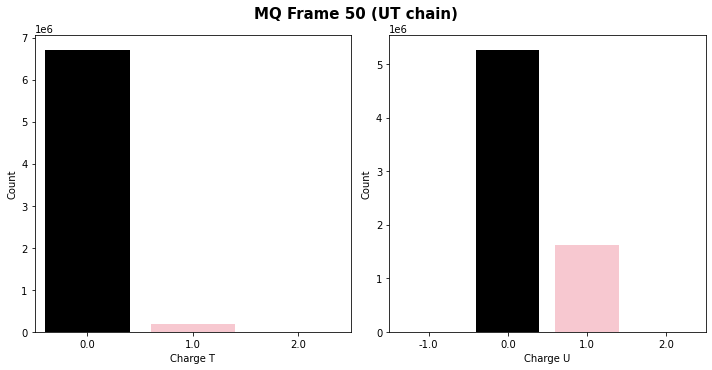

In [19]:
# This wiil make the plot of the count of each charge distribution including count from the mc simulation.create the subplots
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

fig = plt.figure(figsize = (10,5))


fig.suptitle("MQ Frame 50 (UT chain)", y= 1.02,fontweight='bold', fontsize = 15)
# fig.text(0.5, 0.04, 'Charge', ha='center')
# fig.text(0.02, 0.5, 'Count', va='center', rotation='vertical')



plt.subplot(121)

cl1_data = data1.groupby('Crg_T').Count.sum().reset_index()
sns.barplot(x='Crg_T', y='Count', data = cl1_data, palette= custom_palette)
plt.xlabel("Charge T")
plt.ylabel("Count")

plt.subplot(122)

cl1_data = data1.groupby('Crg_U').Count.sum().reset_index()
sns.barplot(x='Crg_U', y='Count', data = cl1_data, palette= custom_palette)
plt.xlabel("Charge U")
plt.ylabel("Count")

plt.tight_layout()
fig.savefig("cluster_charge_count_mq50_TU.pdf", bbox_inches='tight', dpi = 600)   



In [20]:
# Will  add the background charge here. Background charge is added in the file non_ms_crg.xlsx.
non_ms_crg = pd.read_excel("non_ms_crg.xlsx", index_col = 0)
non_ms_crg

,non_ms,Charge
0,non_ms_T,0
1,non_ms_U,0
2,non_cls_no_ms_crg,11


In [21]:
# create the dictionary from the pandas data frame
non_ms_crg_dict = dict(zip(non_ms_crg["non_ms"], non_ms_crg.Charge))
non_ms_crg_dict

{'non_ms_T': 0, 'non_ms_U': 0, 'non_cls_no_ms_crg': 11}

In [22]:
#Add charge column in each ms list
ms_T_all = ms_T
ms_T_all.append('Crg_T')

ms_U_all = ms_U
ms_U_all.append('Crg_U')
ms_U_all

['GLUU0123_U',
 'LYSU0204_U',
 'HISU0211_U',
 'HISU0218_U',
 'LYSU0235_U',
 'HISU0292_U',
 'GLUU0377_U',
 'Crg_U']

In [23]:
# make total charge and occupancy table  for cluster 1
T_chain_unique_all = data1.groupby(ms_T_all).Count.sum().reset_index()
# lets make one column that has percentage occupancy
T_chain_unique_all["Occupancy"] = (T_chain_unique_all.Count/sum(T_chain_unique_all.Count)).round(3)
T_chain_unique = T_chain_unique_all.T
T_chain_unique["std"] = T_chain_unique.std(axis = 1).round(3)

# # delete if std is zero and also remove std column
T_chain_unique = T_chain_unique.loc[T_chain_unique['std'] != 0].T[:-1]
T_chain_unique = T_chain_unique.sort_values(by = 'Count', axis = 0, ascending = False)
print(len(T_chain_unique))
T_chain_unique

7


,GLUT0132_T,LYST0329_T,ASPT0386_T,Crg_T,Count,Occupancy
0,-1.0,0.0,-1.0,0.0,6716098.0,0.973
2,-1.0,1.0,-1.0,1.0,141807.0,0.021
1,-1.0,0.0,0.0,1.0,24133.0,0.003
4,0.0,0.0,-1.0,1.0,17107.0,0.002
5,0.0,0.0,0.0,2.0,401.0,0.000
6,0.0,1.0,-1.0,2.0,307.0,0.000
3,-1.0,1.0,0.0,2.0,147.0,0.000


In [24]:
# make total charge and occupancy table  for cluster 1
U_chain_unique_all = data1.groupby(ms_U_all).Count.sum().reset_index()
# lets make one column that has percentage occupancy
U_chain_unique_all["Occupancy"] = (U_chain_unique_all.Count/sum(U_chain_unique_all.Count)).round(3)
U_chain_unique = U_chain_unique_all.T
U_chain_unique["std"] = U_chain_unique.std(axis = 1).round(3)

# # delete if std is zero and also remove std column
U_chain_unique = U_chain_unique.loc[U_chain_unique['std'] != 0].T[:-1]
U_chain_unique = U_chain_unique.sort_values(by = 'Count', axis = 0, ascending = False)
print(len(U_chain_unique))
U_chain_unique

11


,GLUU0123_U,LYSU0204_U,LYSU0235_U,HISU0292_U,GLUU0377_U,Crg_U,Count,Occupancy
3,-1.0,1.0,1.0,0.0,-1.0,0.0,5219242.0,0.756
4,-1.0,1.0,1.0,0.0,0.0,1.0,1604896.0,0.233
7,0.0,0.0,1.0,0.0,-1.0,0.0,23777.0,0.003
1,-1.0,1.0,0.0,0.0,0.0,0.0,15133.0,0.002
2,-1.0,1.0,0.0,1.0,-1.0,0.0,12542.0,0.002
5,-1.0,1.0,1.0,1.0,-1.0,1.0,12289.0,0.002
8,0.0,0.0,1.0,0.0,0.0,1.0,7189.0,0.001
9,0.0,1.0,1.0,0.0,-1.0,1.0,2517.0,0.000
0,-1.0,1.0,0.0,0.0,-1.0,-1.0,1051.0,0.000
10,0.0,1.0,1.0,0.0,0.0,2.0,754.0,0.000


In [ ]:
# let save the data
writer1 = pd.ExcelWriter('cluster_crg_unique_mq50_UT_dry.xlsx', engine='xlsxwriter')
T_chain_unique.to_excel(writer1, sheet_name='T_chain_unique')
T_chain_unique_all.to_excel(writer1, sheet_name='T_chain_unique_all')
U_chain_unique.to_excel(writer1, sheet_name='U_chain_unique')
U_chain_unique_all.to_excel(writer1, sheet_name='U_chain_unique_all')
writer1.save()